In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('figure', facecolor='w')
from matplotlib import cm
from astropy.io import fits, ascii
from matplotlib import collections  as mc

In [107]:
binaries = pd.read_csv('/home/jess/Downloads/Elbadry_200pc_binaries_v2.csv.gz')

In [108]:
binaries['bp_rp'] = binaries['phot_bp_mean_mag'] - binaries['phot_rp_mean_mag']
binaries['g_abs'] = binaries['phot_g_mean_mag'] + 5*np.log10(binaries['parallax'])-10
binaries['bp_rp2'] = binaries['phot_bp_mean_mag2'] - binaries['phot_rp_mean_mag2']
binaries['g_abs2'] = binaries['phot_g_mean_mag2'] + 5*np.log10(binaries['parallax2'])-10
binaries.keys()

Index(['source_id2', 'ra2', 'dec2', 'astrometric_chi2_al_2',
       'astrometric_n_good_obs_al2', 'phot_g_mean_flux_over_error2',
       'phot_rp_mean_flux_over_error2', 'phot_bp_mean_flux_over_error2',
       'phot_bp_rp_excess_factor2', 'pmra2', 'pmra_error2', 'pmdec2',
       'pmdec_error2', 'phot_g_mean_mag2', 'phot_bp_mean_mag2',
       'phot_rp_mean_mag2', 'parallax2', 'parallax_over_error2',
       'radial_velocity2', 'radial_velocity_error2', 'rv_nb_transits2',
       'source_id', 'ra', 'dec', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'parallax',
       'parallax_over_error', 'astrometric_chi2_al',
       'astrometric_n_good_obs_al', 'phot_g_mean_flux_over_error',
       'phot_rp_mean_flux_over_error', 'phot_bp_mean_flux_over_error',
       'phot_bp_rp_excess_factor', 'radial_velocity', 'radial_velocity_error',
       'rv_nb_transits', 'pairdistance', 'binary_class', 's_AU', 'bp_rp',
       'g_abs', 'bp_rp2',

In [109]:
test = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/safe_results.csv')
new = test[test['TEFF_APOGEE'] < 4200][test['TEFF_APOGEE'] > 2850][test['M_H_APOGEE'] > -.5][test['M_H_APOGEE'] < .5]
test = new

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [110]:
# get gaia IDs of M dwarfs in binaries

pairs1 = np.array(list(set(test['GAIA_ID']) & set(binaries['source_id'])))
pairs2 = np.array(list(set(test['GAIA_ID']) & set(binaries['source_id2'])))
len(pairs1), len(pairs2)

(110, 106)

In [111]:
# get table of binary parameters for each m dwarf in a pair

ind1 = np.array([np.where(binaries['source_id'] == ID)[0][0] for ID in pairs1])
bin1 = binaries.iloc[ind1]

ind2 = np.array([np.where(binaries['source_id2'] == ID)[0][0] for ID in pairs2])
bin2 = binaries.iloc[ind2]

In [227]:
len(bin1[bin1['g_abs2'] > 7.5]) + len(bin2[bin2['g_abs'] > 7.5])

170

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


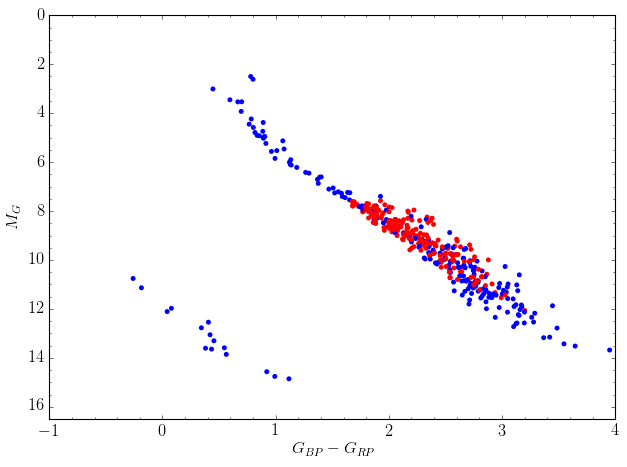

In [220]:
plt.scatter(bin1['bp_rp'], bin1['g_abs'], edgecolor='none', color='r')
plt.scatter(bin1['bp_rp2'], bin1['g_abs2'], edgecolor='none', color='b')

plt.scatter(bin2['bp_rp'], bin2['g_abs'], edgecolor='none', color='b')
plt.scatter(bin2['bp_rp2'], bin2['g_abs2'], edgecolor='none', color='r')
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(16.5,0)
plt.xlim(-1,4)
# plt.title(r'No RUWE cut', fontsize=20)
plt.tick_params(labelsize=15)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [46]:
double_m = list(set(ind1) & set(ind2))
dm = binaries.iloc[double_m]

idx1 = np.array([np.where(test['GAIA_ID'] == ID)[0][0] for ID in dm['source_id']])
mm1 = test.iloc[idx1]

idx2 = np.array([np.where(test['GAIA_ID'] == ID)[0][0] for ID in dm['source_id2']])
mm2 = test.iloc[idx2]

In [157]:
# RAVE FGK binaries

# rave = pd.read_csv('/home/jess/Downloads/rave_DR2_gaia_source.csv.gz')
rav2 = pd.read_csv('/home/jess/Downloads/rav2.csv')

idx2 = np.array([np.where(test['GAIA_ID'] == ID)[0][0] for ID in rav2['source_id2']])
rav_fgk2 = test.iloc[idx2]

In [161]:
# APOGEE FGK binaries

apo2 = pd.read_csv('/home/jess/Downloads/apo2.csv')

idx2 = np.array([np.where(test['GAIA_ID'] == ID)[0][0] for ID in apo2['source_id2']])
apo_fgk2 = test.iloc[idx2]

In [132]:
# LAMOST FGK binaries

lam1 = pd.read_csv('/home/jess/Downloads/lam1.csv')
lam2 = pd.read_csv('/home/jess/Downloads/lam2.csv')

idx1 = np.array([np.where(test['GAIA_ID'] == ID)[0][0] for ID in lam1['source_id']])
lam_fgk1 = test.iloc[idx1]

idx2 = np.array([np.where(test['GAIA_ID'] == ID)[0][0] for ID in lam2['source_id2']])
lam_fgk2 = test.iloc[idx2]

In [178]:
np.array(apo2['FE_H'])

array([ 0.271562, -0.083737, -0.029557])

In [183]:
can_s1 = np.array([0.01400408,  0.17765665,  0.01892894, -0.15069354, -0.14987266,
        0.10616177, -0.14904295, -0.01078327, 
           -0.23732239, -0.24926655,
           0.20326119, -0.02841632,
           0.10571562, -0.0193072 , -0.00072274])
can_s2 = np.array([0.10458322,  0.27032891,  0.08684766, -0.14739728, -0.1306955 ,
        0.01193574, -0.1402226 ,  0.04182827, 
           -0.34, -0.18,
           0.32, -0.06,
           0.271562, -0.083737, -0.029557])
np.std(can_s1 - can_s2)

0.07618926603624131

In [192]:
asp_s1 = np.array([-0.18455 , -0.023279, -0.19658 , -0.25224 , -0.24851 , -0.23011 ,
       -0.16361 , -0.23899,
         -0.34168, -0.32524,
         0.056611, -0.1601,
         -0.17637, -0.13272, -0.11996])

asp_s2 = np.array([-0.016849,  0.09619 , -0.053078, -0.23716 , -0.41038 , -0.37507 ,
       -0.24672 , -0.20095,
         -0.34, -0.18,
           0.32, -0.06,
           0.271562, -0.083737, -0.029557])

np.std(asp_s1 - asp_s2)

0.14962961183304146

In [205]:
lam1.keys()

Index(['col1', 'source_id2', 'ra2', 'dec2', 'astrometric_chi2_al_2',
       'astrometric_n_good_obs_al2', 'phot_g_mean_flux_over_error2',
       'phot_rp_mean_flux_over_error2', 'phot_bp_mean_flux_over_error2',
       'phot_bp_rp_excess_factor2', 'pmra2', 'pmra_error2', 'pmdec2',
       'pmdec_error2', 'phot_g_mean_mag2', 'phot_bp_mean_mag2',
       'phot_rp_mean_mag2', 'parallax2', 'parallax_over_error2',
       'radial_velocity2', 'radial_velocity_error2', 'rv_nb_transits2',
       'source_id', 'ra_1', 'dec_1', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'parallax', 'parallax_over_error',
       'astrometric_chi2_al', 'astrometric_n_good_obs_al',
       'phot_g_mean_flux_over_error', 'phot_rp_mean_flux_over_error',
       'phot_bp_mean_flux_over_error', 'phot_bp_rp_excess_factor',
       'radial_velocity', 'radial_velocity_error', 'rv_nb_transits',
       'pairdistance', 'binary_class', 's_AU', 'bp_rp', 'g_abs

In [216]:
for s in np.array(lam1['s_AU']):
    print(s)

5888.372787217709
6633.69238282819


In [208]:
lam1['source_id']

0     374137560388179328
1    4031346880591589248
Name: source_id, dtype: int64

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


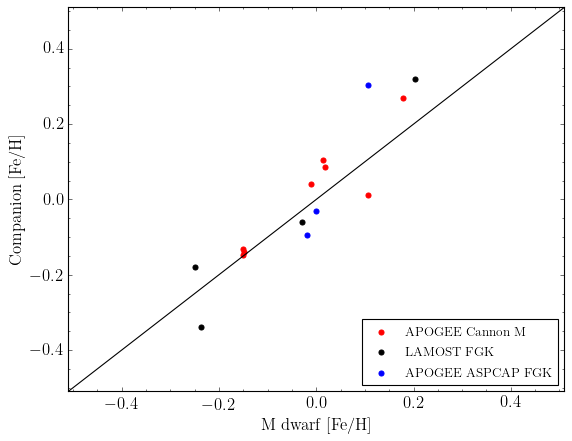

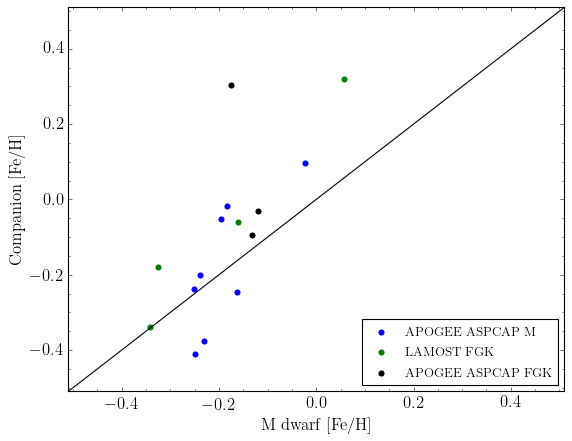

In [218]:
plt.scatter(mm1['FE_H'], mm2['FE_H'], color='r', label='APOGEE Cannon M')
plt.scatter(lam_fgk1['FE_H'], lam1['feh'], color='k', label='LAMOST FGK')
plt.scatter(lam_fgk2['FE_H'], lam2['feh'], color='k', label=None)
plt.scatter(apo_fgk2['FE_H'], apo2['M_H'], color='b', label='APOGEE ASPCAP FGK')

x = np.arange(-10,10,.5)
plt.plot(x,x, color='k')
plt.xlabel('M dwarf [Fe/H]', fontsize=15)
plt.ylabel('Companion [Fe/H]', fontsize=15)
# plt.title(r'Metallicities of Wide Binaries', fontsize=18)
plt.xlim(-.51,.51)
plt.ylim(-.51,.51)
plt.legend(loc='lower right', scatterpoints=1, frameon=True, fontsize=12)
plt.minorticks_on()
plt.tick_params(labelsize=15)
plt.show()

# ==========================

plt.scatter(mm1['M_H_APOGEE'], mm2['M_H_APOGEE'], color='b', label='APOGEE ASPCAP M')
plt.scatter(lam_fgk1['M_H_APOGEE'], lam1['feh'], color='g', label='LAMOST FGK')
plt.scatter(lam_fgk2['M_H_APOGEE'], lam2['feh'], color='g', label=None)
plt.scatter(apo_fgk2['M_H_APOGEE'], apo2['M_H'], color='k', label='APOGEE ASPCAP FGK')

x = np.arange(-10,10,.5)
plt.plot(x,x, color='k')
plt.xlabel('M dwarf [Fe/H]', fontsize=15)
plt.ylabel('Companion [Fe/H]', fontsize=15)
# plt.title(r'Metallicities of Wide Binaries', fontsize=18)
plt.xlim(-.51,.51)
plt.ylim(-.51,.51)
plt.legend(loc='lower right', scatterpoints=1, frameon=True, fontsize=12)
plt.minorticks_on()
plt.tick_params(labelsize=15)
plt.show()

In [141]:
diff = np.array(mm1['FE_H']) - np.array(mm2['FE_H'])
print(np.mean(diff), np.std(diff))

diff = np.array(mm1['M_H_APOGEE']) - np.array(mm2['M_H_APOGEE'])
print(np.mean(diff), np.std(diff))

-0.0301061750234567 0.05729045669245754
-0.011731499999999999 0.12128751235597177


In [91]:
plt.scatter(mm1['FE_H'], np.array(mm2['FE_H']) - np.array(mm1['FE_H']), color='r', label='Cannon')

plt.scatter(mm1['M_H_APOGEE'], np.array(mm2['M_H_APOGEE']) - np.array(mm1['M_H_APOGEE']), color='b', label='ASPCAP')
plt.axhline(0, color='k')
plt.xlabel('Secondary [Fe/H]', fontsize=15)
plt.ylabel('Primary [Fe/H]', fontsize=15)
plt.title(r'Metallicities of Wide Binaries', fontsize=18)
plt.xlim(-.51,.51)
plt.ylim(-.51,.51)
plt.legend(loc='upper left', scatterpoints=1, frameon=True)
plt.minorticks_on()
plt.tick_params(labelsize=15)
plt.show()


Index(['Unnamed: 0', 'APOGEE_ID', 'BP_MAG', 'BP_RP', 'DEC', 'GAIA_ID', 'G_MAG',
       'H_MAG', 'H_MAG_ERR', 'J_MAG', 'J_MAG_ERR', 'K_MAG', 'K_MAG_ERR',
       'M_H_APOGEE', 'PLX', 'PLX_ERR', 'PMDEC', 'PMDEC_ERR', 'PMRA',
       'PMRA_ERR', 'RA', 'RP_MAG', 'RV_APOGEE', 'RV_APOGEE_ERR', 'RV_GAIA',
       'RV_GAIA_ERR', 'SNR', 'TEFF_APOGEE', 'DIST', 'G_ABS', 'J_ABS', 'H_ABS',
       'K_ABS', 'X', 'Y', 'Z', 'Vx', 'Vy', 'Vz', 'TEFF', 'FE_H', 'CHI_MANN',
       'SPT', 'CHI_WEST', 'line1', 'line2'],
      dtype='object')